# <center>Método Upwind de Segunda Ordem</center>

O método upwind de segunda ordem (Warming e Beam, 1975) é uma variação do método de MacCormack, que utiliza diferenças para trás (upwind) tanto no passo de previsão quanto no passo de correção para c > 0:

Passo de Previsão:
\begin{equation}
u_{j}^{\overline{n+1}} = u_{j,n} - \frac{c \Delta t}{\Delta x} \left(u_{n,j} - u_{j-1}^n \right)
\tag{4.52}
\end{equation}


Passo de Correção:
\begin{equation}
u_{j}^{n+1} = \frac{1}{2} \left[ u_{j}^{n} + u_{j}^{\overline{n+1}} - \frac{c \Delta t}{\Delta x} \left(u_{j}^{\overline{n+1}} - u_{j-1}^{\overline{n+1}}\right) - \frac{c \Delta t}{\Delta x} \left(u_{j}^{n} - 2u_{j-1}^{n} + u_{j-2}^{n}\right) \right]
\tag{4.53}
\end{equation}

A adição da segunda diferença para trás na Equação 4.53 torna esse esquema de segunda ordem de precisão com um erro de truncamento (T.E.) de $O(\Delta x^2, \Delta x \Delta t, \Delta t^2)$. Se a Equação 4.52 for substituída na Equação 4.53, obtemos o seguinte algoritmo de um único passo:

\begin{equation}
u_{j}^{n+1} = u_{j}^n - v\left(u_{j}^n - u_{j-1}^n\right) + \frac{1}{2}v\left(v-1\right)\left(u_{j}^n - 2u_{j-1}^n + u_{j-2}^n\right)
\tag{4.54}
\end{equation}

A equação modificada para esse esquema é:

\begin{equation}
u_t + c u_x = \frac{c (\Delta x)^2}{6} (1 - \nu)(2 - \nu)u_{xxx} - \frac{c (\Delta x)^4}{8\Delta t} \nu(1 - \nu)^2(2 - \nu)u_{xxxx}
\tag{4.55}
\end{equation}

### <center>Questão 5F da lista 4</center> 

Resolva, numericamente, a equação da onda:

\begin{equation}
u_t + u_x = 0
\end{equation}

\begin{equation}
0 \leqslant x \leqslant L
\end{equation}

Submetida à condição inicial: 

\begin{equation}
u(x,0) = sin\left ( 2n\pi \frac{x}{L} \right )
\end{equation}

e à condições de contorno periódicas, utilizando os seguintes esquemas de diferenças finitas:

- ~~Upstream~~
- ~~Leap Frog~~
- ~~Lax-Wendroff de 2 passos~~
- **Upwind de 2a Ordem**
- ~~Rusanov ($\omega = 3$)~~
- ~~Euler Explícito~~
- ~~Lax~~
- ~~Lax-Wendroff~~
- ~~MacCormack~~
- ~~Trapezoidal (Time Centered Implicit)~~
- ~~Warming-Kutler-Lomax~~

Escolha uma malha com 41 pontos e $\Delta x = 1$ (logo, $L = 40$) e calcule para $t = 18$. Resolva este problema para $n = 3$ e $v = 1$, $v = 0.6$ e $v = 0.3$ e compare graficamente com a solução exata. Determine $\beta$ para $n = 3$ e calcule os erros na amplitude e na fase para esquema com $v = 0.6$. Compare estes erros com os que
aparecem nos gráficos.

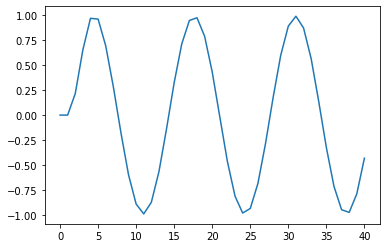

In [91]:
#Upwind de 2a Ordem

import numpy as np
import matplotlib.pyplot as plt

quantidade_iteracao = 20
l=40
delta_x=1
delta_t=0.05
t_final=18
n=3
c=1
q_pontos=41
x = np.arange(0,l+delta_x,delta_x)
t = np.arange(0,t_final+delta_t,delta_t)
u_old = np.zeros(q_pontos)
u_corretor= np.zeros(q_pontos)
u_preditor= np.zeros(q_pontos)
v=c*(delta_t/delta_x)
u_old = np.sin(2*n*np.pi*x/l)

for n in range (0, t_final):
    for j in range(1,q_pontos):
        #u_old[j] = u_old[j] - v*(u_old[j] - u_old[j-1]) + (1/2)*v*(v-1)*(u_old[j] - 2 * u_old[j-1] + u_old[j-2])
        u_preditor[j] = u_old[j]-v*(u_old[j]-u_old[j-1])
    #u_corretor[0:] = u_preditor[0:]
    for j in range(2,q_pontos):    
        u_corretor[j] = (1/2) *(u_old[j] + u_preditor[j]- v*(u_preditor[j]-u_preditor[j-1]) - v*(u_old[j] - 2 * u_old[j-1] + u_old[j-2]))
    u_old[0:] = u_corretor[:]
plt.plot (u_old);        